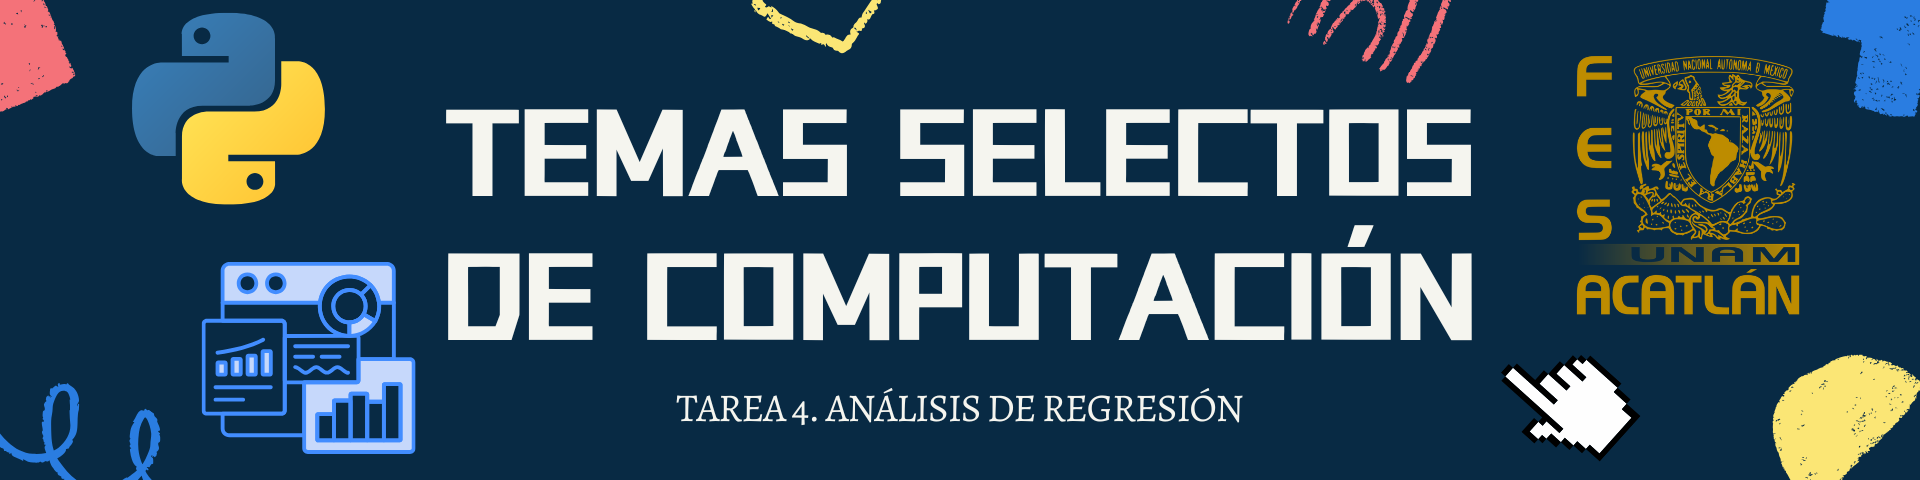

 ---
  ## Integrantes:
  ---
*  🦾 Díaz Sánchez David
*  ⛵ Hernández Vargas Héctor
*  ☔ López Armenta Kevin Josue
*  🎳 Martín Mejía Julio Yahir
*  🦋 Meza Torres Ana Yohali
*  🔥 Morales Ramirez Angel Francisco
*  💐 Salazar Pérez Perla Monserrat
*  💣 Zuñiga Galván Diego Antonio

---

# **Comentarios del Profesor**
Buen dominio del tema y se nota la inversión del tiempo a la elaboración del análisis. Faltaron algunos elementos en la exploración del dataset.
Calificación 9.5



---

## Importación de Librerías y Datos


---



 Comenzamos importando las librerías para realizar todo el análisis explicativo de los datos, para gráficar y posteriormete plasmar nuestro análisis de regresión.

In [ ]:
# Importamos Librerías
import pandas as pd                 # Pandas para manejo de datos y DataFrames
import numpy as np                  # Manejo de operaciones matemáticas
import seaborn as sns               # Para crear gráficos vistosos
import matplotlib.pyplot as plt     # Ayudar a crear más gráficos

# Importamos los módulos de sklearn necesarios para nuestro análisis
from sklearn.linear_model import LinearRegression       #
from sklearn.model_selection import train_test_split    #
from sklearn import metrics                             # Predicciones
import statsmodels.api as sm                            #

In [ ]:
# Una vez subidos los datos a GitHub, obtenemos el link tipo raw y lo guardamos en la variable 'datos'
datos = "https://raw.githubusercontent.com/DavidDiaz24/TSC/refs/heads/main/Salary.csv"

In [ ]:
# Guardamos los datos en un DataFrame de pandas
salario = pd.DataFrame(pd.read_csv(datos))

# Mostramos las primeras 6 observaciones
salario.head(6)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0
5,29.0,Male,1,Marketing Analyst,2.0,55000.0,USA,Hispanic,0




---

## Limpieza y Organización de las Variables


---



In [ ]:
# La variable a predecir es salario y la unica variable que vamos a quitar es "Job Title"
# Esto ya que no es posible asignarle valores númericos
salario.drop(columns=["Job Title"], inplace=True)

# Mostramos las primeras 6 observaciones
salario.head(6)

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,5.0,90000.0,UK,White,0
1,28.0,Female,2,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,15.0,150000.0,Canada,White,1
3,36.0,Female,1,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,20.0,200000.0,USA,Asian,0
5,29.0,Male,1,2.0,55000.0,USA,Hispanic,0


In [ ]:
# Observamos estadisticas útiles de cada una de las variables
salario.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


### Creamos Variables Dummies


---



In [ ]:
# Creamos variables dummies en la variable 'Country'
pais = pd.get_dummies(salario["Country"], drop_first = True)

# Observamos que se crean cuatro columnas más a partir de Country
# los cuales son los paises definidos originalmente
pais.head()

,Canada,China,UK,USA
0,False,False,True,False
1,False,False,False,True
2,True,False,False,False
3,False,False,False,True
4,False,False,False,True


In [ ]:
# Para fácilitar el cambiar a unos y ceros la variable 'Gender' la asignamos como dummie
# Esto hará que se creé la columna 'Male' la cual arrojara valores booleanos
sexo = pd.get_dummies(salario["Gender"], drop_first = True)

# Observamos la nueva variable
sexo.head()

,Male
0,True
1,False
2,True
3,False
4,True


In [ ]:
# Creamos variable dummie a la variable 'Race' la cual tiene 8 diferentes posibles valores
# Esto ayuda a que podamos identificar las razas de manera numérica
raza = pd.get_dummies(salario["Race"], drop_first = True)

# Observamos las nuevas variables
raza.head()

,Asian,Australian,Black,Chinese,Hispanic,Korean,Mixed,Welsh,White
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,False


In [ ]:
# Concatenamos las nuevas variables en nuestro DataFrame original 'salario'
salario = pd.concat([salario, pais, sexo, raza], axis = 1)

# Borramos las columnas de las cuales obtuvimos estas variables
# para que todo quede en términos numéricos y podamos iniciar con la regresión
salario.drop(["Gender", "Country", "Race"], inplace = True, axis = 1)

# Borramos las posibles observaciones con alguna variable vacía para eliminar ruido
salario.dropna()

# Mostramos las primeras 5 observaciones
salario.head()

,Age,Education Level,Years of Experience,Salary,Senior,Canada,China,UK,USA,Male,Asian,Australian,Black,Chinese,Hispanic,Korean,Mixed,Welsh,White
0,32.0,1,5.0,90000.0,0,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1,28.0,2,3.0,65000.0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False
2,45.0,3,15.0,150000.0,1,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,36.0,1,7.0,60000.0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,52.0,2,20.0,200000.0,0,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [ ]:
# Observamos el tamaño de nuestra muestra y cuantas variables tenemos
print(f"En total tenemos {salario.shape[1]} variables con {salario.shape[0]} observaciones.")

En total tenemos 19 variables con 6684 observaciones.




---


## Pre - Análisis de las Variables


---



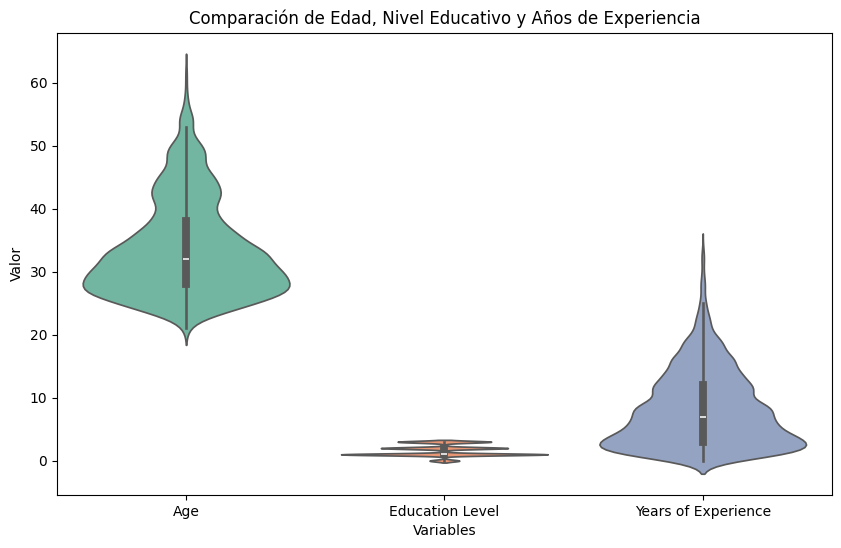

In [ ]:
##Gráficamos nuestras variables usando .melt para que las tres variables puedan graficarse en un único eje x con sus valores en el eje y.
salario_melted = salario[['Age', 'Education Level', 'Years of Experience']].melt(var_name='Variable', value_name='Value') #Reorganizamos los datos al formato "largo".

plt.figure(figsize=(10, 6))

#Creamos un gráfico de violín.
sns.violinplot(x='Variable', y='Value', data=salario_melted, hue='Variable', palette='Set2', legend=False) #x='Variable' ubica las categorías (Age, Education Level, Years of Experience) en el eje x;
                                                                                                           #y='Value' grafica los valores correspondientes a estas variables en el eje y.

plt.title('Comparación de Edad, Nivel Educativo y Años de Experiencia')
plt.xlabel('Variables')
plt.ylabel('Valor')

plt.show()

#El gráfico muestra las tres variables comparadas.
#Cada "violín" representa la distribución de los valores de la variable correspondiente donde las zonas mas anchas representan mayor densidad de datos en esos valores.
#Incluyendo también una linea que señala la mediana y los cuartiles de los datos.

---
##Matriz de correlación
---

Para poder válidar uno de los primeros supuestos para nuestra regresión con ayuda de la matriz de correlación el cual es que las variables predictoras no deben estar correlacionadas entre si.

Para nuestro análisis podemos observar que las primeras tres variables tienen fuerte correlación entre si. Esto se puede explicar ya que son:

*   Age
*   Education Level
*   Years of Experience

La fuerte correlación podría suponerse del hecho de que entre más años tenga una persona, tendrá más experiencia y mayor grado de estudio. podríamos eliminar alguna de estas variables y dejar solo la que mejor explique las tres.


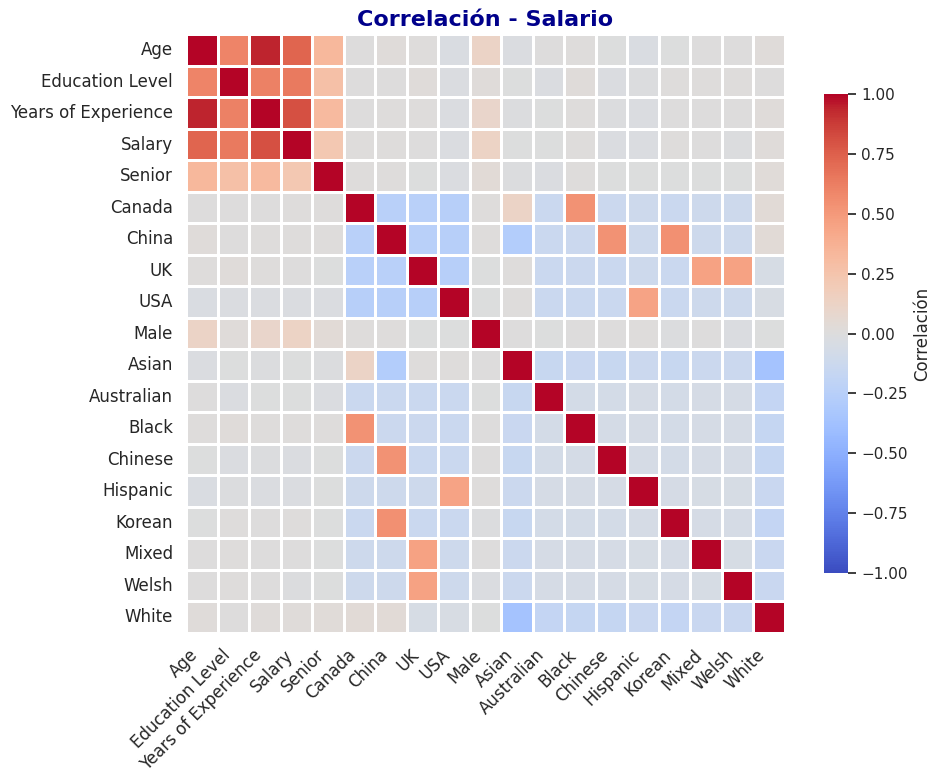

In [ ]:
# Gráfica de la correlacion
sns.set_theme(style="white", palette="muted")

plt.figure(figsize=(10, 8))
sns.heatmap(salario.corr(), annot=False, cmap="coolwarm", vmin=-1, vmax=1,
            linewidths=1, linecolor='white',
            cbar_kws={'shrink': 0.8, 'label': 'Correlación'}, square=True)

plt.title("Correlación - Salario", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

##El color de cada celda indica la fuerza de la correlación entre dos variables, los colores rojos indican una correlación positiva fuerte, mientras que los colores mas azules indican una correlación negativa fuerte

In [ ]:
#Calculamos la matriz de correlación
salario.corr()
#Compara todas las columnas númericas del DataFrame salario
#Por defecto la función utiliza el coeficiente de correlación de Pearson, con valores entre -1 y 1
#1: Correlación positiva fuerte
#0: No hay correlación
#-1: Correlación negativa fuerte


,Age,Education Level,Years of Experience,Salary,Senior,Canada,China,UK,USA,Male,Asian,Australian,Black,Chinese,Hispanic,Korean,Mixed,Welsh,White
Age,1.000000,0.596380,0.937609,0.728343,0.334070,0.004838,0.016509,0.011427,-0.024928,0.117401,-0.018251,0.002904,0.012649,-0.005343,-0.025168,-0.001563,0.002809,0.006852,0.019398
Education Level,0.596380,1.000000,0.613165,0.645444,0.273466,0.000943,0.003240,0.022116,-0.016037,0.022621,-0.004457,-0.019163,0.020160,-0.023031,-0.009052,0.010485,0.009456,0.015423,0.007468
Years of Experience,0.937609,0.613165,1.000000,0.810942,0.317877,0.005155,0.014132,0.013262,-0.020944,0.098809,-0.013831,-0.000952,0.013299,-0.009121,-0.023181,0.002604,0.003194,0.001325,0.019545
Salary,0.728343,0.645444,0.810942,1.000000,0.223636,0.010795,0.009246,0.005789,-0.022055,0.127276,-0.000649,-0.005460,0.015532,-0.020480,-0.020864,0.009197,0.004446,-0.011910,0.021151
Senior,0.334070,0.273466,0.317877,0.223636,1.000000,0.012132,0.014805,-0.001187,-0.019692,0.038852,-0.014425,-0.016744,0.009667,-0.002677,-0.004384,-0.004344,-0.001805,-0.005449,0.028339
Canada,0.004838,0.000943,0.005155,0.010795,0.012132,1.000000,-0.248524,-0.247712,-0.250496,0.010514,0.122149,-0.133724,0.531358,-0.132290,-0.111708,-0.134515,-0.113878,-0.113698,0.037088
China,0.016509,0.003240,0.014132,0.009246,0.014805,-0.248524,1.000000,-0.249695,-0.252502,0.009459,-0.280669,-0.134794,-0.132055,0.532302,-0.112602,0.541255,-0.114790,-0.114609,0.038572
UK,0.011427,0.022116,0.013262,0.005789,-0.001187,-0.247712,-0.249695,1.000000,-0.251676,-0.006446,0.012597,-0.134354,-0.131623,-0.132913,-0.112234,-0.135149,0.459719,0.458994,-0.047734
USA,-0.024928,-0.016037,-0.020944,-0.022055,-0.019692,-0.250496,-0.252502,-0.251676,1.000000,-0.004296,0.009250,-0.135864,-0.133103,-0.134407,0.445947,-0.136668,-0.115700,-0.115518,-0.040897
Male,0.117401,0.022621,0.098809,0.127276,0.038852,0.010514,0.009459,-0.006446,-0.004296,1.000000,0.003379,-0.006285,0.004984,0.004466,0.008636,-0.010716,0.007673,-0.020579,-0.001868



---

### Eliminar Variable Correlacionada



---



Eliminar variables correlacionadas con otras o redundantes ayuda a disminur la complejidad de nuestro análisis ya que es preferible trabajar con menos varibles, ya sea para explicar o simplemente por sencillez y rápidez computacional.

In [ ]:
# Eliminamos la variable 'Age' ya que esta fuertemente correlacionada con 'Years of Experience',
# previamente probamos a eliminar la columna de 'Years of Experience' pero decaía signifiativamente el coeficiente de determinación

salario.drop(["Age"], inplace = True, axis = 1)

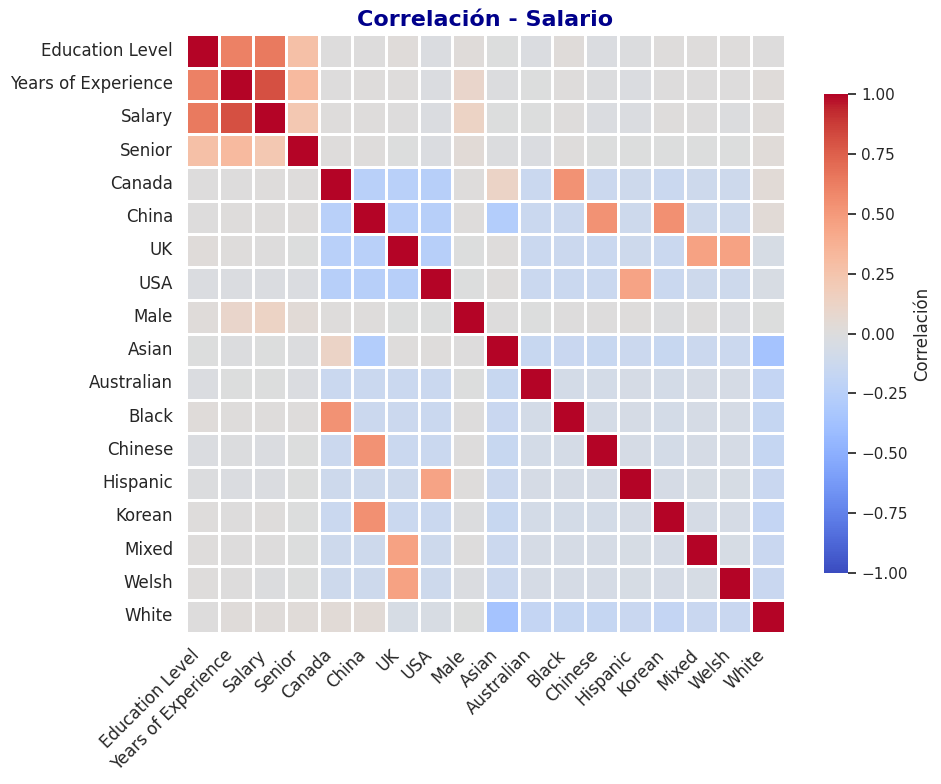

In [ ]:
# Volvemos a gráficar la Matriz de Correlación
sns.set_theme(style="white", palette="muted")

plt.figure(figsize=(10, 8))
sns.heatmap(salario.corr(), annot=False, cmap="coolwarm", vmin=-1, vmax=1,
            linewidths=1, linecolor='white',
            cbar_kws={'shrink': 0.8, 'label': 'Correlación'}, square=True)

plt.title("Correlación - Salario", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

# Observamos que ahora ya no hay datos tan correlacionados



---


## Análisis de Regresión



---



In [ ]:
# Predictores
X = salario.drop(columns=["Salary"])
#Eliminamos la columna Salary, pues es la variable que queremos predecir (variable dependiente), el resto de columnas serán nuestros predictores (variables independientes)
X.head()
#Esta línea nos muestra las primeras filas del DataFrame despues de eliminar Salary

,Education Level,Years of Experience,Senior,Canada,China,UK,USA,Male,Asian,Australian,Black,Chinese,Hispanic,Korean,Mixed,Welsh,White
0,1,5.0,0,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1,2,3.0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False
2,3,15.0,1,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,1,7.0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,2,20.0,0,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [ ]:
# Variable a predecir
Y = salario["Salary"]
#Se asigna la columna Salary a la nueva variable Y, aislando la variable dependiente, lo que más adelante nos permitirá comparar los valores predichos para la variable dependiente con los valores reales
Y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
6679,200000.0
6680,50000.0
6681,55000.0
6682,140000.0


---
### División de datos para entrenamiento y prueba
---

In [ ]:
# Partimos nuestra muestra de tamaño n para poder usarla para testear y entrenar nuestro modelo respectivamente.
# La partición la hace de manera aleatoria.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
# Y contiene la variable objetivo y X contiene a nuestras variables independientes.
# El 30% de los datos se reservará para el conjunto de prueba y el restante se utilizará para entrenar el modelo.
# El conjunto de prueba se utiliza para evaluar el desempeño del modelo en datos que no ha visto durante el entrenamiento,
# lo que proporciona una estimación mas realista de su rendimiento.
# Usamos random_state=42 para asegurarnos que la división sea reproducible, lo que significa que en cada
# ejecución del codigo los resultados serán los mismos.

In [ ]:
X_train.head()

,Education Level,Years of Experience,Senior,Canada,China,UK,USA,Male,Asian,Australian,Black,Chinese,Hispanic,Korean,Mixed,Welsh,White
188,1,1.5,0,False,False,True,False,True,False,False,False,False,False,False,False,True,False
3802,2,10.0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
287,1,4.0,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False
1738,3,14.0,1,True,False,False,False,True,False,False,True,False,False,False,False,False,False
4162,2,11.0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [ ]:
Y_train.head()

,Salary
188,35000.0
3802,110000.0
287,65000.0
1738,180000.0
4162,117000.0


In [ ]:
#Verficación de división de datos
print(f" Verificamos que la partición de la muestra se haya hecho correctamente : {X_train.shape[0]+ X_test.shape[0] == salario.shape[0]}")
#De esta manera se asegura que no exista pérdida de datos.

 Verificamos que la partición de la muestra se haya hecho correctamente : True


---
##Entrenamiento del modelo
---

In [ ]:
# Entrenar el modelo
lrm = LinearRegression()
lrm.fit(X_train, Y_train)
# Entramos el modelo con el método fit utilizando el conjunto de datos de entrenamiento
# Este código toma los datos de entrenamiento (características y variable objetivo) y utiliza
# un algoritmo para encontrar la mejor linea recta que se ajuste a los datos.

LinearRegression()

---
##Prueba del modelo
---


Las predicciones con el modelo entrenado son realizadas para poder probar que tan bien se ajusta la regresión a los datos observados que ya teníamos, la regresión se entrenó con Y_train y X_train y se prueba que tan bien ajusta con Y_test y X_test. Se  contrasta y es una de las maneras de determinar que tan buena es la regresión.

La idea de particionar la muestra es evaluar la capacidad del modelo para generalizar a datos nuevos que no se usaron durante el entrenamiento.

Estas predicciones las usaremos en el siguiente bloque.

In [ ]:
# Regresa un array
predicciones = lrm.predict(X_test)
# Utilizamos el método predict para obtener predicciones sobre un conjunto de datos desconocidos,
# es decir nuestro conjunto de datos de prueba.


#Cada valor en este vector contiene una predicción para una observación en el conjunto de prueba.
predicciones

array([ 95340.64722967, 157635.06823674,  80872.6329933 , ...,
        79947.43792793,  74663.72284159,  99492.05942821])

In [ ]:
print(f"Número de predicciones de testeo : {predicciones.shape[0]}")
#Indica el número de predicciones en el array

Número de predicciones de testeo : 2006


---
##Comparación valores reales y predicciones
---

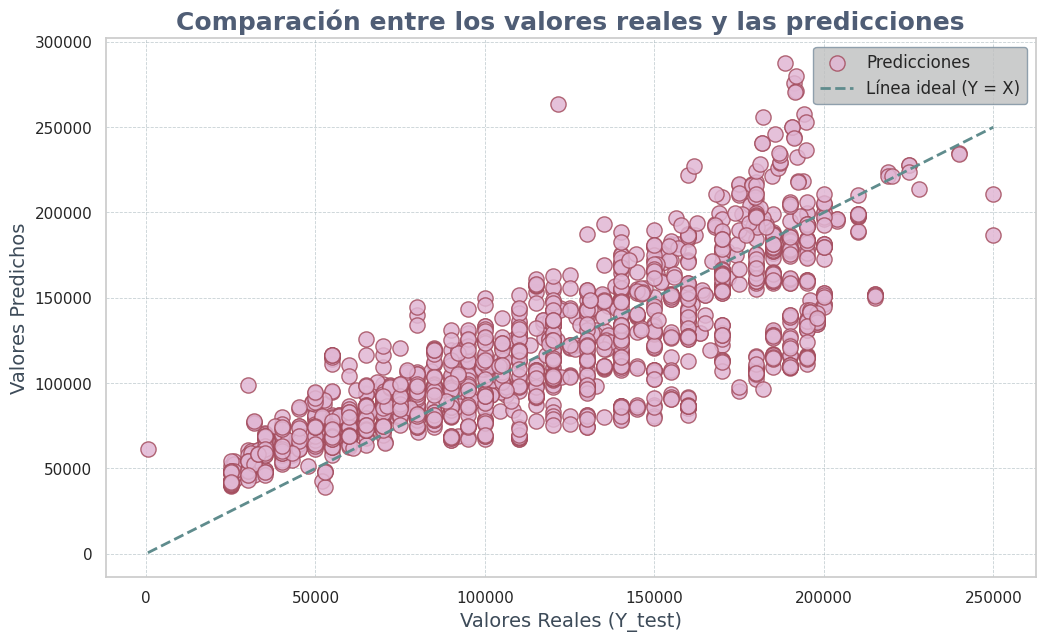

In [ ]:
#Gráfica comparativa entre los valores reales y las predicciones
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

plt.scatter(Y_test, predicciones, color='#e1b7d4', s=120, edgecolor='#a44d5e', alpha=0.85, label='Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='#5f8c8d', linestyle='--', linewidth=2, label='Línea ideal (Y = X)')

plt.title('Comparación entre los valores reales y las predicciones', fontsize=18, fontweight='bold', color='#4f5d75')
plt.xlabel('Valores Reales (Y_test)', fontsize=14, color='#3d4b59')
plt.ylabel('Valores Predichos', fontsize=14, color='#3d4b59')
plt.legend(fontsize=12, loc='best', facecolor='#bfc0c0', edgecolor='#7a8e9e')
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6, color='#a2b3b8')

plt.show()

#El gráfico indica de manera rápida, visual y efectiva que nuestro modelo es preciso, debido a que los puntos del grafico se concentran en la linea diagonal.
#De la misma manera nos indica que no existe un sesgo sistemico (sobreestimar o subestimar), pues los puntos se encuentran de manera tanto encima como por debajo de la línea.



---


### Errores o Residuales ϵ


---


ϵ = Y - Y_est

Los errores los obtenemos de restar a los valores Y que tenemos muestras Y_est o predicciones. Esto ayuda a válidar algunos supuestos importantes sobre los errores. Los cuales son:



*   E(ϵ) = 0
*   Var(ϵ) = σᶻ Es constante
*   Las ϵ son independientes
*   ϵ tiene comportamiento o tendencia normal

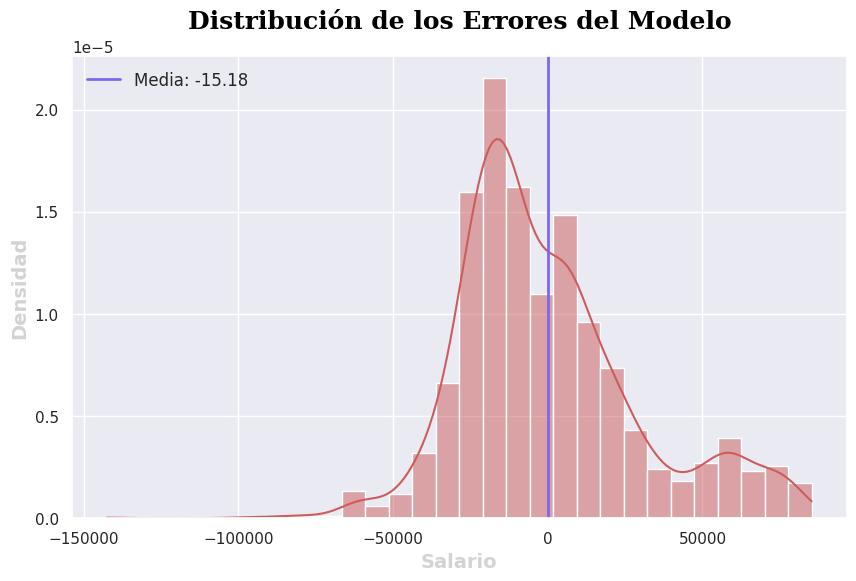

In [ ]:
#Gráfica de los Errores

errores = Y_test - predicciones
#Calculamos los errores

sns.set(style="darkgrid", palette="coolwarm")

plt.figure(figsize=(10, 6))

sns.histplot(errores, kde=True, color="indianred", bins=30, stat="density", linewidth=1, fill=True)
#Utilizamos una curva de Kernel para suavizar los datos
#Normalizamos el histograma para que el área bajo la curva sea 1

mean_error = np.mean(errores)
#Se calcula la media de los errores

plt.axvline(mean_error, color='mediumslateblue', linestyle='-', label=f'Media: {mean_error:.2f}', lw=2)
#Dibuja una linea vertical en el valor de la media de los errores

plt.title('Distribución de los Errores del Modelo', fontsize=18, weight='bold', color='black', fontname='DejaVu Serif', pad=20)

plt.xlabel('Salario', fontsize=14, weight='bold', color='lightgray')
plt.ylabel('Densidad', fontsize=14, weight='bold', color='lightgray')

plt.legend( title_fontsize=13, loc='upper left', fontsize=12, frameon=False, shadow=True)

plt.show()

#El histograma muestra como se distribuyen los errores de predicción, ya que es simétrica y centrada en cero, el modelo esta haciendo predicciones precisas en promedio.

Observamos que en nuestro caso, el comportamiento de los errores discrepa ligeramente de la forma exacta de una Normal(0,σ) pero si tiende a tener un comportamiento normal.

Además aunque la esperanza no es exactamente 0, podemos observar que debido a que las observaciones de ϵ son muy variantes, aun así esta relativamente cerca del cero. Lo cual podría considerarse como validar este supuesto en un cierto grado.



---
##Coeficiente de determinación (R^2)
---

El Coeficiente de Determinación Rᶻ es una medida de bondad de ajuste entre la recta estimada y los datos reales. Esta nos ayuda a evaluar que tan bien está nuestra regresión para poder estimar observaciones de Y dadas las variables X.

In [ ]:
#R^2 de todos los datos
print(f" El Coeficiente de Determinación para todos los datos es: R^2 = {lrm.score(X, Y):.4f}")
#Este valor indica que el modelo tiene alta probabilidad de ser un modelo que describe bien los datos

 El Coeficiente de Determinación para todos los datos es: R^2 = 0.6996


In [ ]:
#R^2 de los datos de prueba
print(f"El coeficiente de Determinación para los datos de la prueba es : R^2 = {lrm.score(X_test, Y_test):.4f}")
#Este valor indica un buen ajuste de nuestro modelo

El coeficiente de Determinación para los datos de la prueba es : R^2 = 0.6887


In [ ]:
#R^2 de los datos de entrenamiento
print(f"El coeficiente de Determinación para los datos de entrenamiento es : R^2 = {lrm.score(X_train, Y_train):.4f}")
#Este valor indica que el modelo explica aproximadamente el 71% de la variabilidad de los datos

El coeficiente de Determinación para los datos de entrenamiento es : R^2 = 0.7042


En nuestro caso podemos observar que los valores para Rᶻ son relativamente altos, ya que son mayores a 0.68 en cada uno de las diferentes predicciones, lo que significa que en mayor medida estamos prediciendo la variable Y = Salario con las demás variables X de nuestro modelo. Lo cual quiere decir que nuestra regresión es significativa y podría usarse para predecir el salario de una persona dadas las demás variables X.

Más adelante evaluaremos que tan significativas son las variables predictoras.

---
##Tipos de errores
---

El análisis de los errores de tipo:


*   Error Cuadrático Medio (Mean Squared Error)
*   Raíz del Error Cuadrático Medio (Root Mean Squared Error)
*   Error Absoluto Medio (Mean Absolute Error)

Nos ayudan a realizar análisis de que tan buenas son nuestras predicciones, entre más pequeñas sean estas métricas, significará que nuestra regresión está más ajustada a los datos reales y puede ser usada para predecir. Son otra forma de evaluar la eficiencia de la regresión.



In [ ]:
#Error cuadrático medio (MSE)
print(f" El Error Cuadrático Medio: MSE = {metrics.mean_squared_error(Y_test, predicciones):.4f}")

#Debido a que los datos van de 350 a 250,000, el alto valor del MSE nos indica que los valores de nuestro modelo estan muy lejos de los salarios reales.

 El Error Cuadrático Medio: MSE = 862717267.8070


In [ ]:
#Raíz cuadrada del error cuadrático medio (RMSE)
print(f" La Raíz del Error Cuadrático Medio: RMSE = {np.sqrt(metrics.mean_squared_error(Y_test, predicciones)):.4f}")

# Este valor nos indica que las predicciones de nuestro modelo estan desviadas en 28,680 unidades del salario real.

 La Raíz del Error Cuadrático Medio: RMSE = 29372.0491


In [ ]:
#Error absoluto medio (MAE)
print(f" El Error Medio Absoluto: MAE = {metrics.mean_absolute_error(Y_test, predicciones):.4f}")
# Este valor es menor a los dos anteriores y esto nos puede indicar que outliers esten inflando los valores anteriores.

 El Error Medio Absoluto: MAE = 22667.3889




---

## Interpretación de la Estimación



---



---
##Coeficientes
---

Y = ΣβᵢXᵢ + βₒ

Los coeficientes de nuestra regresión lineal nos darán información importante de como explican las variables independientes a la variable Y = Salario, es decir que dependiendo de los coeficientes veremos cuales variables son más sifnificativas, cuales incrementan el salario y cuales lo disminuyen, lo que nos dará maneras más sencillas de explicar fenomenos que afectan el salario.

In [ ]:
intercepto = lrm.intercept_
betas = list(lrm.coef_)
columnas = list(X.columns)

print("-------------------------------------------------------------")
print(f"El intercepto de la regresión es : β0 = {intercepto:.4f}")
print("-------------------------------------------------------------\n")
print("El coeficiente beta estimado para las columnas son:\n" )
for i in range(0,17):
  print(f"{columnas[i]} : β{i+1} = {betas[i]:.4f}")

print("-------------------------------------------------------------")

-------------------------------------------------------------
El intercepto de la regresión es : β0 = 39312.4400
-------------------------------------------------------------

El coeficiente beta estimado para las columnas son:

Education Level : β1 = 14862.9017
Years of Experience : β2 = 5910.9087
Senior : β3 = -8840.9158
Canada : β4 = 766.5729
China : β5 = 927.0380
UK : β6 = -158.6222
USA : β7 = 622.3231
Male : β8 = 5814.0226
Asian : β9 = 2133.3318
Australian : β10 = 4037.2429
Black : β11 = 1853.3043
Chinese : β12 = 90.0839
Hispanic : β13 = 938.2189
Korean : β14 = 2189.7768
Mixed : β15 = 1636.0103
Welsh : β16 = -2047.5322
White : β17 = 2383.9696
-------------------------------------------------------------




**Coeficiente para Education Level (14862.9017)**

-  Un coeficiente positivo indica que mientras más alto es el nivel educativo aumenta el valor del salario en 15474 unidades

**Coeficiente para Years of Experience (5910.9087)**

-  Este valor indica que con cada año de experiencia, la variable salario aumenta en 8167.07 unidades

**Coeficientes binarios**

-  Por ejemplo el coeficiente de la variable Male nos indica que si el trabajador es hombre el salario aumenta en 660.41 unidades






---

## Evaluación de la regresión



---



---
###Minimos cuadrados con Statmodels
---

Los Mínimos Cuadrados son la forma predeterminada para calcular los coeficientes de la regresión lineal. Esta se basa en minimizar la suma de los errores ϵ^2, entonces los estimadores resultantes β serán los que hagan esto. Para evaluar los resultados de mejor manera será necesario realizarlo de esta manera paso por paso para medir la efectividad de la regresión por medio de pruebas de hipótesis.

In [ ]:
# Agregar una columna de unos a las variables X_test.
# Esto es necesario para incluir el término βₒ (intercepción) en el modelo de regresión.

X_sm = sm.add_constant(X_train)

# Verificamos que se haya agregado la columna
X_sm.head()

,const,Education Level,Years of Experience,Senior,Canada,China,UK,USA,Male,Asian,Australian,Black,Chinese,Hispanic,Korean,Mixed,Welsh,White
188,1.0,1,1.5,0,False,False,True,False,True,False,False,False,False,False,False,False,True,False
3802,1.0,2,10.0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
287,1.0,1,4.0,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False
1738,1.0,3,14.0,1,True,False,False,False,True,False,False,True,False,False,False,False,False,False
4162,1.0,2,11.0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Convertimos los valores booleanos a enteros para poder optimizar númericamente
# Las variables que inicialmente eran dummies
booleanos = ['Canada', 'China', "UK", "USA", "Male", "Asian", "Australian", "Black", "Chinese", "Hispanic", "Korean", "Mixed", "Welsh", "White"]

# Navegamos sobre todas las columnas booleanas
for i in booleanos:
  X_sm[i] = X_sm[i].astype(int)

X_sm.head()

,const,Education Level,Years of Experience,Senior,Canada,China,UK,USA,Male,Asian,Australian,Black,Chinese,Hispanic,Korean,Mixed,Welsh,White
188,1.0,1,1.5,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3802,1.0,2,10.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
287,1.0,1,4.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1738,1.0,3,14.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4162,1.0,2,11.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Crear un modelo de regresión lineal usando el método de mínimos cuadrados ordinarios (OLS)
model = sm.OLS(Y_train, X_sm)

# Ajustar el modelo de regresión lineal a los datos de entrenamiento
lrm_results=model.fit()

In [ ]:
# Mostrar un resumen detallado del modelo de regresión lineal
print(lrm_results.summary())

# - Coeficientes de regresión (intercepción y pendientes)
# - Error estándar de los coeficientes
# - Estadísticas t y p-valores
# - R-cuadrado (R²) y otras métricas de ajuste del modelo
# - Estadísticas de los residuos, etc.

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     652.6
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:48:51   Log-Likelihood:                -54665.
No. Observations:                4678   AIC:                         1.094e+05
Df Residuals:                    4660   BIC:                         1.095e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.931e+04   2

In [ ]:
print(lrm_results.summary2())

# La diferencia principal entre .summary() y .summary2() es que
# summary2() muestra un formato ligeramente más fácil de leer

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.703      
Dependent Variable:     Salary              AIC:                   109365.2166
Date:                   2024-11-21 04:48    BIC:                   109481.3279
No. Observations:       4678                Log-Likelihood:        -54665.    
Df Model:               17                  F-statistic:           652.6      
Df Residuals:           4660                Prob (F-statistic):    0.00       
R-squared:              0.704               Scale:                 8.2998e+08 
------------------------------------------------------------------------------
                      Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
------------------------------------------------------------------------------
const               39312.4400 2689.1528 14.6189 0.0000  34040.4281 44584.4519
Education Level     14862.9017  611.8561 24.2915 0.0000  13663.3743 16062.42

**Interpretación de OSL Tabla 1 y 2** Esta tabla genera un resumen del análisis de regresión incluyendo coeficientes, tipos de errores, valores t, la significancia de cada variable, etc, los resultados más importantes serian:


*   La variables a predecir es el Salario
*   $R^2=0.703$ Es un valor alto, lo que sugiere que tenemos un buen ajuste del modelo pues explica el $70.3\%$ de la variable dependiente
*   Nuestro numero de observaciones es $4,678$ , lo cual podemos considerar una muestra relativamente pequeño pero suficiente para hacer un análisis de regresión
*   Durbin-Watson=$2.055$ Indica que no hay evidencia de autocorrelación por lo que el modelo cumple con los supuesto de regresión lineal
*   $P-$Value En este caso todos son muy bajos, lo que indica que todas las variables incluidas en el modelo son significativas para explicar el salario.
*   Los coeficientes al ser mayores que $0$ indican que a mayor edad, nivel educativo y años de experiencia el salario promedio aumenta considerablemente.
*   F-statistic$=652.6$ y Prob (F-statistic) $=0$ Representa que el modelo globalmente es significativo, esto implica que cada variable independiente tiene impacto en el salario
*   Coeficiente de Male (Hombres ) $=5814.02$ Representa que ser hombre se asocia a un mayor salario que el ser mujer
*   Las etnia asociada a un mayor salario es "Australian"
*   El país asocia a un mayor salario es China
*   Los grados de Libertad del Modelo son $17$
*   $AIC$ evalúa la calidad de un modelo en términos de su capacidad predictiva.Es útil solo cuando se compara con otros modelos: el modelo con el AIC más bajo entre varios candidatos es el preferido.
*   $BIC$ Similar a $AIC$ con la diferencia de que se basa en el marco bayesiano y considera el tamaño de la muestra. Para determinar si el valor es bueno tendria que compararse con otros modelos




En sintesis OLS proporciona una visión detallada de cómo diferentes variables afectan el salario, incluyendo factores como la edad, el nivel de educación, los años de experiencia, y diversas características demográficas, todo esto justificando mediante el respectivo análisis de regresión


In [ ]:
# Observamos que es muy similar a lo obtenido anteriormente
print(f" El coeficiente de determinación con OLS : R^2 = {lrm_results.rsquared:.4f}")

 El coeficiente de determinación con OLS : R^2 = 0.7042


In [ ]:
# Encontramos los estimadoes de los coeficientes e intercepto
# Observamos que son iguales a los obtenidos anteiormente
lrm_results.params

,0
const,39312.440048
Education Level,14862.901743
Years of Experience,5910.908690
Senior,-8840.915775
Canada,766.572878
China,927.037994
UK,-158.622187
USA,622.323135
Male,5814.022645
Asian,2133.331845




---

# Conclusiones

---



Tras realizar la realizacion de este trabajo donde se empleo un análisis de regresión utilizando el conjunto de datos "Salary by Job Title and Country" hemos llegado a las siguientes conclusiones:

*   **Supuestos de Regresión Lineal**: Recordemos los supuestos del modelo que son


1.   Colinealidad
2.   Homocedasticidad
3.   $\varepsilon$ ~ $N(0, \sigma^2)$
4.   Esperanza de los Errores


*   **Colinealidad**: Ocurre cuando 2 variables predictoras estan fuertemente correlacionadas entre si, esto implica que la información que explican es redundante esto se soluciona eliminando las variables redundantes, en nuestro caso no encontramos variables redundantes y unicamente eliminamos la variable "Age" por que era la variable que menos explicaba entre las tres más correlacionadas y solo agregaba complejidad a la regresión.

*   **Homocedasticidad**: Se refiere a que los errores de nuestro modelo tienen varianza constante, cuando esto no ocurre las estimaciones de los coeficientes son imprecisas y los intervalos de confianza incorrectos, esto se soluciona aplicando una transformación a nuestras variables en nuestro caso comprobamos que si se cumplia el supuesto mediante de la gráfica de los errores donde no se podian observar valores atípicos y en el apartado de errores residuales corroboramos que $Var(\varepsilon)=\sigma^2$

*    **Distribución de los errores** Se refiere a que los errores sigan una distribución normal , es decir,  $\varepsilon$ ~ $N(0, \sigma^2)$  La no normalidad puede invalidar los resultados pues nuestros errores del modelo serán significamente altos, en nuestro caso comprobamos este supuesto con la gráfica de los errores donde se puede observar una distribución normal con $\mu =-14.30$

* **Esperanza de los Errores** Hace referencia a que $\mathbb{E} (ɛ) =0$ esto para asegurar que el modelo de regresión es insesgado, aunque este supuesto originalmente no se cumplia nostros lo solucionamos al hacer el error residual como los valores de $y$ menos sus valos estimados, es decir $\varepsilon=y-\hat{y}$


Nuestro rendimiento del modelo se puede observar con el coeficiente de determinación $R^2=0.71$ significa que el 71% de la variabilidad de la variable dependiente es explicada por el modelo, lo que podemos considerar como un buen ajuste del modelo , que podria mejorarse al agregar otras variables relevantes en los datos originales

Finalmente podemos concluir de manera general que el análisis de regresión es una herramienta estadística extremadamente útil y poderosa ya que nos sirve para  predecir el valor de una variable en el futuro además de explicar la relación de esta variable dependiente ($y$) en función de otras variables independientes ($x_i$) y notar que tanto efecto tiene una variable ($x_i$) al momento de predecir ($y$), en este caso podemos notar como el salario de un persona puede ser predecido mediante la edad, años de experiencia, su raza, etc






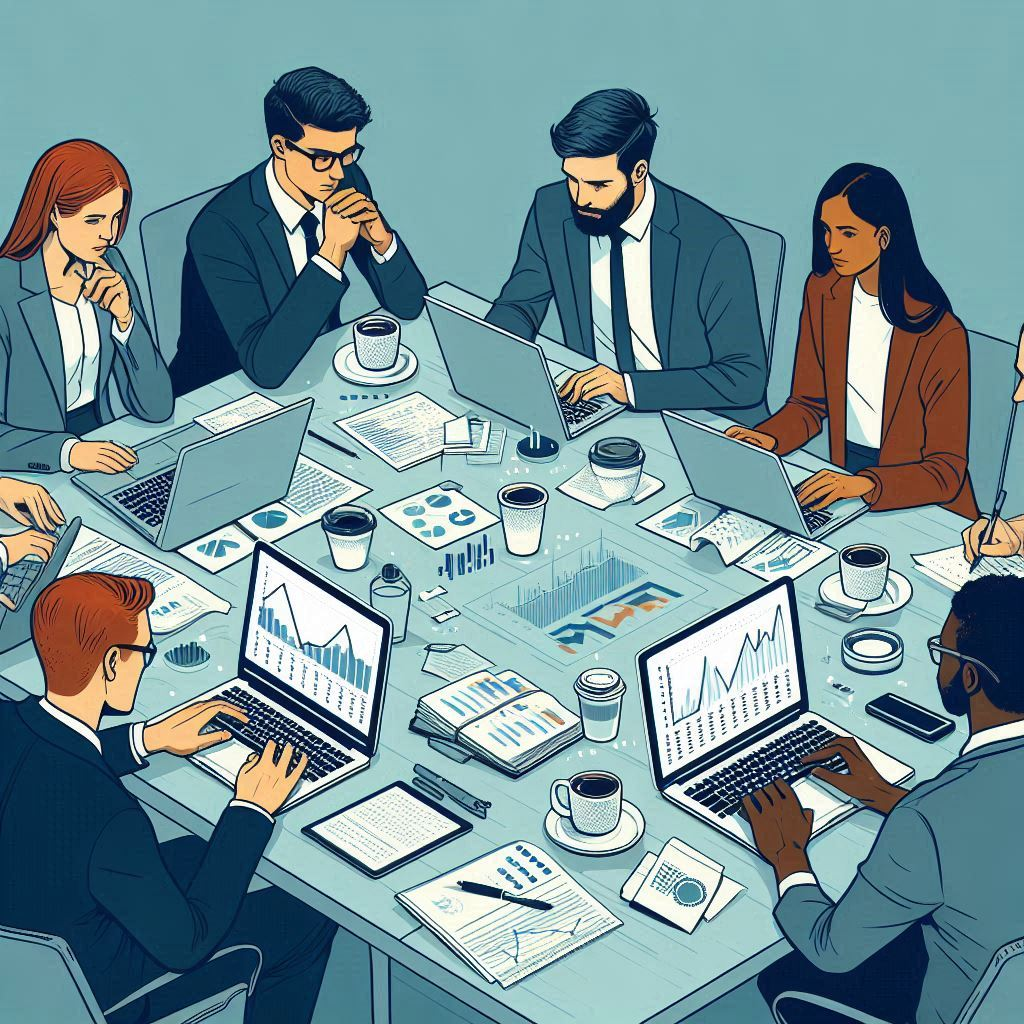